In [91]:
using Pkg
Pkg.add("HTTP")
Pkg.add("JSON")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("StatsPlots")

Pkg.Types.PkgError: The following package names could not be resolved:
 * Date (not found in project, manifest or registry)
Please specify by known `name=uuid`.

In [38]:
#Pkg.add("TableReader")
# temporarily unavailable
Pkg.add(PackageSpec(url="https://github.com/danielw2904/TableReader.jl"))

   Cloning git-repo `https://github.com/danielw2904/TableReader.jl`
  Updating git-repo `https://github.com/danielw2904/TableReader.jl`====>                               ]  20.5 %.2 %>                     ]  47.0 %2 %          ]  72.8 %Fetching: [================================>        ]  79.9 %
  Updating git-repo `https://github.com/danielw2904/TableReader.jl`
 Resolving package versions...
  Updating `~/Project.toml`
  [70df011a] ↑ TableReader v0.4.0 ⇒ v0.4.1 #master (https://github.com/danielw2904/TableReader.jl)
  Updating `~/Manifest.toml`
  [70df011a] ↑ TableReader v0.4.0 ⇒ v0.4.1 #master (https://github.com/danielw2904/TableReader.jl)


In [96]:
using Dates
import HTTP
import JSON
import CSV
import TableReader
using Plots
using StatsPlots

In [15]:
r = HTTP.request("GET", 
    "https://www.alphavantage.co/query?"*
    "function=TIME_SERIES_INTRADAY&"*
    "symbol=MSFT&"*
    "interval=5min&"*
    "datatype=csv&"*
    "apikey=ENV['alpha_vantage_api_key']"
)
body=String(r.body)

"timestamp,open,high,low,close,volume\r\n2020-03-19 16:00:00,144.2300,144.8900,141.6700,142.6800,2458714\r\n2020-03-19 15:55:00,144.9540,146.3284,143.0782,144.2338,2543025\r\n2020-03-19 15:50:00,147.3400,147.5900,144.7200,144.9010,1276412\r\n2020-03-19 15:45:00,146.6000,147.5623,145.8700,147.3600,955331\r\n2020-03-19 15:40:00,146.7400,147.2000,146.0100,146.5800,677951\r\n2020-03-19 15:35:00,147.2300,148.1900,145.6400,146.7700,887290\r\n2020-03-19 15:30:00,147.9200,148.6000,147.2300,147.2300,840395\r\n2020-03-19 15:25:00,147.2660,147.9600,146.5400,147.9600,674032\r\n2020-03-19 15:20:00,146.4300,147.6600,146.2900,147.2750,600045\r\n2020-03-19 15:15:00,145.6200,146.6300,145.2900,146.4100,810697\r\n2020-03-19 15:10:00,146.9500,147.3300,145.5200,145.5750,606269\r\n2020-03-19 15:05:00,147.4600,147.4600,146.0300,146.9400,674940\r\n2020-03-19 15:00:00,147.4200,147.6300,147.3900,147.4200,425725\r\n2020-03-19 14:55:00,149.0500,149.3100,147.1000,147.4000,533286\r\n2020-03-19 14:50:00,148.5600,149

In [23]:
data=CSV.Source(body)
#data=JSON.parse(body)

UndefVarError: UndefVarError: Source not defined

In [109]:
csvOriginal=TableReader.readcsv(
    "https://www.alphavantage.co/query?"*
    "function=TIME_SERIES_INTRADAY&"*
    "symbol=AAPL&"*
    "interval=5min&"*
    "datatype=csv&"*
    "apikey="*ENV["alpha_vantage_api_key"]
)

,timestamp,open,high,low,close,volume
,DateTime,Float64,Float64,Float64,Float64,Int64
1,2020-03-20T10:40:00,251.13,251.44,250.69,251.28,589775
2,2020-03-20T10:35:00,250.42,251.74,250.33,251.076,579000
3,2020-03-20T10:30:00,250.943,251.47,250.27,250.43,569640
4,2020-03-20T10:25:00,250.28,251.27,249.83,250.98,937517
5,2020-03-20T10:20:00,249.28,250.55,249.28,250.325,815903
6,2020-03-20T10:15:00,249.37,250.03,248.5,249.28,681110
7,2020-03-20T10:10:00,249.93,250.05,248.97,249.371,690787
8,2020-03-20T10:05:00,248.36,250.03,248.09,249.91,859426
9,2020-03-20T10:00:00,248.74,249.13,247.88,248.39,699513


In [112]:
csv = filter(row -> day(row[:timestamp]) == 19, csvOriginal)

,timestamp,open,high,low,close,volume
,DateTime,Float64,Float64,Float64,Float64,Int64
1,2020-03-19T16:00:00,246.27,246.7,244.695,244.79,1633454
2,2020-03-19T15:55:00,249.18,249.19,244.24,246.25,1613951
3,2020-03-19T15:50:00,249.71,250.0,248.55,249.13,626101
4,2020-03-19T15:45:00,248.85,249.732,248.63,249.732,668082
5,2020-03-19T15:40:00,248.86,248.92,248.32,248.88,547074
6,2020-03-19T15:35:00,248.66,248.9,248.32,248.9,485304
7,2020-03-19T15:30:00,249.75,250.11,248.49,248.65,516307
8,2020-03-19T15:25:00,248.85,249.73,248.85,249.73,522482
9,2020-03-19T15:20:00,249.14,249.49,247.87,248.84,657758


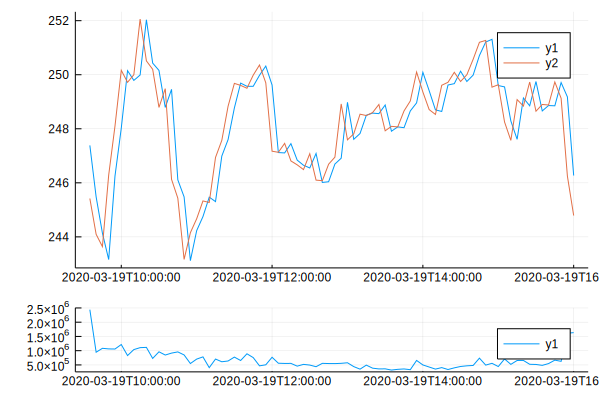

In [114]:
plot( plot(csv.timestamp,[csv.open, csv.close]), plot(csv.timestamp,csv.volume), layout = grid(2, 1, heights=[0.8, 0.2]))

In [140]:
function hey(x)
    println("hey")
    x^2 + 2x - 1
end
function generate_moving_average(arr)
    size = 4
    mapreduce(x->hey(x), +, [3,4])
end
generate_moving_average([1:2])

hey
hey


37

In [136]:
insertcols!(d, 1, :movingAverage => )

LoadError: syntax: unexpected ")"

In [144]:
using Statistics

function moving_average(X::Vector,numofele::Int)
    BackDelta = div(numofele,2) 
    ForwardDelta = isodd(numofele) ? div(numofele,2) : div(numofele,2) - 1
    len = length(X)
    Y = similar(X)
    for n = 1:len
        lo = max(1,n - BackDelta)
        hi = min(len,n + ForwardDelta)
        Y[n] = mean(X[lo:hi])
    end
    return Y
end

moving_average([1:9],3)

MethodError: MethodError: no method matching UnitRange{Int64}(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}})
Closest candidates are:
  UnitRange{Int64}(::Any, !Matched::Any) where T<:Real at range.jl:277
  UnitRange{Int64}(!Matched::UnitRange{T}) where T<:Real at range.jl:873
  UnitRange{Int64}(!Matched::UnitRange) where T<:Real at range.jl:874
  ...